# 01 - Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from scipy import stats


# Base Application Data

# 02 - Carregar os dados

In [11]:
data = pd.read_csv('application_data.csv')
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# 03 - 1a Tratativa: Análise de Distribuição

- Antes de decidir como tratar os valores nulos, é importante entender a distribuição das colunas. 
- Plotar histogramas e calcular estatísticas descritivas (média, mediana, desvio padrão, etc.) ajudará a tomar uma decisão formada.


## Teste de Aderência 

Teste de Aderência 

Para realizar um teste de aderência e descobrir qual distribuição teórica melhor representa os dados das colunas numéricas (AMT_CREDIT, AMT_INCOME_TOTAL, CNT_CHILDREN), você pode seguir os passos a seguir:

- Passo 1: Visualização dos Dados
  
Primeiramente, é importante visualizar a distribuição dos dados para ter uma ideia inicial de qual distribuição teórica pode se adequar melhor aos seus dados.

- Passo 2: Escolha da Distribuição Teórica
  
Com base na visualização, você pode escolher distribuições teóricas que possam ser adequadas para seus dados. Alguns exemplos comuns incluem distribuições normais, exponenciais, log-normais, entre outras, dependendo da forma dos seus dados.

- Passo 3: Teste de Aderência
  
Existem várias maneiras de testar a aderência dos seus dados a uma distribuição teórica. Algumas opções comuns são:

1) Teste de Kolmogorov-Smirnov (KS): Este teste compara a distribuição acumulada empírica dos seus dados com a distribuição acumulada teórica escolhida. O teste KS é usado para avaliar a diferença máxima entre as duas distribuições. O pacote scipy.stats oferece a função kstest para realizar este teste.

2) Teste de qui-quadrado (χ²): Este teste é adequado para comparar a distribuição observada com uma distribuição teórica discreta (por exemplo, distribuição de Poisson). O pacote scipy.stats também oferece a função chisquare para este propósito.

3) Teste de Anderson-Darling: Similar ao teste KS, mas com maior sensibilidade nas caudas da distribuição. Pode ser mais adequado quando se deseja enfatizar os desvios nas caudas da distribuição.

Exemplo de Implementação
Aqui está um exemplo simples usando o teste de Kolmogorov-Smirnov para verificar a aderência dos dados da coluna AMT_CREDIT a uma distribuição normal:

## 03.01 - Colunas com valores numéricos

### Passo 1: Análise Inicial dos Dados - Visualização dos Dados

Primeiro, vamos visualizar a distribuição dos dados e calcular estatísticas descritivas básicas para as colunas selecionadas, para ter uma ideia inicial de qual distribuição teórica pode se adequar melhor aos dados.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Definição dos dados e das colunas selecionadas
data = pd.read_csv('application_data.csv')

# Configuração do estilo do seaborn
sns.set(style="whitegrid")

# Função para ajustar a distribuição teórica e testar a aderência
def testar_distribuicao(df, coluna):
    # Seleciona os dados da coluna
    dados = df[coluna].dropna()
    
    # Ajuste da distribuição teórica
    dist_names = ['norm', 'expon', 'gamma', 'lognorm']  # Exemplos de distribuições
    best_fit_name = None
    best_ad_stat = np.inf
    
    for dist_name in dist_names:
        dist = getattr(stats, dist_name)
        params = dist.fit(dados)
        ad_stat, ad_pvalue = stats.kstest(dados, dist_name, args=params)
        
        if ad_stat < best_ad_stat:
            best_fit_name = dist_name
            best_ad_stat = ad_stat
            best_params = params
    
    print(f'Melhor distribuição para {coluna}: {best_fit_name} com parâmetros {best_params}')
    
    # Plotagem do histograma e da densidade
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Histograma
    axes[0].hist(dados, bins=30, density=True, alpha=0.5, color='b', label='Dados')
    axes[0].set_title(f'Histograma de {coluna}')
    axes[0].set_xlabel(coluna)
    axes[0].set_ylabel('Densidade')
    
    # Distribuição ajustada
    xmin, xmax = axes[0].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    pdf = stats.__dict__[best_fit_name].pdf(x, *best_params[:-2], loc=best_params[-2], scale=best_params[-1])
    axes[0].plot(x, pdf, 'r-', linewidth=2, label='Distribuição Ajustada')
    axes[0].legend()
    
    # Gráfico de densidade
    sns.kdeplot(dados, ax=axes[1], label='Dados', fill=True)
    axes[1].set_title(f'Gráfico de Densidade de {coluna}')
    axes[1].set_xlabel(coluna)
    axes[1].set_ylabel('Densidade')
    
    plt.tight_layout()
    plt.show()

    # Estatísticas descritivas
    print(f'Estatísticas Descritivas para {coluna}:')
    print(dados.describe())

    # Análise de dados nulos
    print(f'\nAnalisando os dados nulos para {coluna}:')
    null_counts = df[coluna].isnull().sum()
    null_percentage = 100 * df[coluna].isnull().mean()
    print(f'Número de valores nulos: {null_counts}')
    print(f'Porcentagem de valores nulos: {null_percentage:.2f}%')

    # Teste de Qui-Quadrado (removido para evitar execução desnecessária)

print('Tratamentos Concluídos!')

Tratamentos Concluídos!


Análises de Distribuição das colunas AMT_CREDIT, AMT_INCOME_TOTAL, CNT_CHILDREN, CNT_FAM_MEMBERS: 

Análise de AMT_CREDIT:
Melhor distribuição para AMT_CREDIT: gamma com parâmetros (1.8757260480809719, 39749.65004474799, 298165.26476735546)


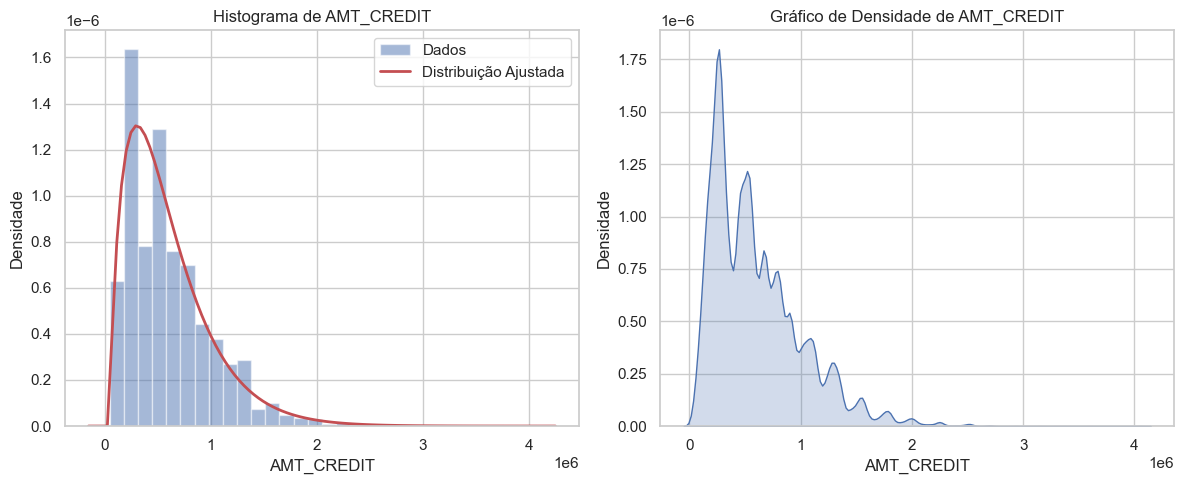

Estatísticas Descritivas para AMT_CREDIT:
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

Analisando os dados nulos para AMT_CREDIT:
Número de valores nulos: 0
Porcentagem de valores nulos: 0.00%

Análise de AMT_INCOME_TOTAL:
Melhor distribuição para AMT_INCOME_TOTAL: lognorm com parâmetros (0.5117744750632975, 5933.704534565313, 141917.74075093147)


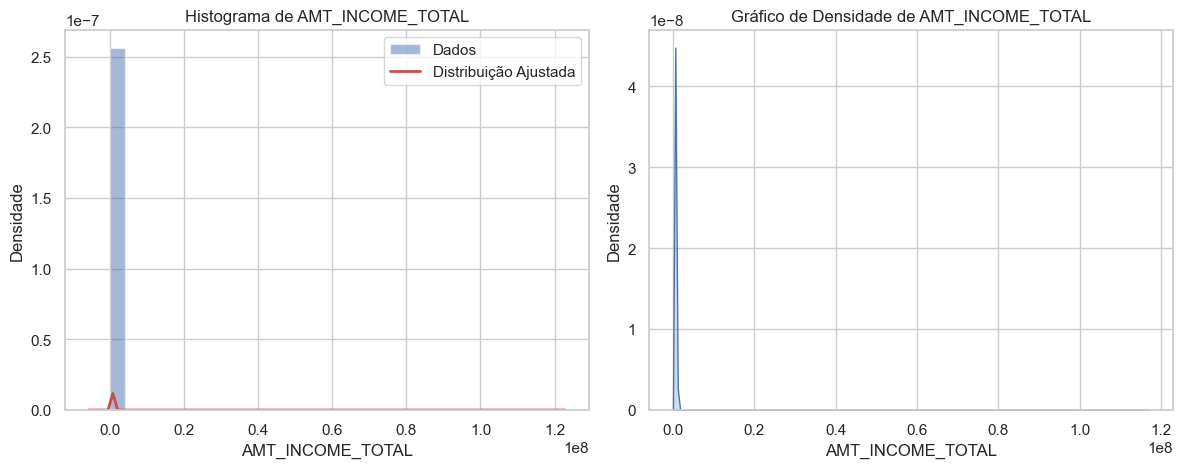

Estatísticas Descritivas para AMT_INCOME_TOTAL:
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

Analisando os dados nulos para AMT_INCOME_TOTAL:
Número de valores nulos: 0
Porcentagem de valores nulos: 0.00%

Análise de CNT_CHILDREN:


C:\Users\amand\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6480: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
C:\Users\amand\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Melhor distribuição para CNT_CHILDREN: norm com parâmetros (0.4170517477423572, 0.7221202102975595)


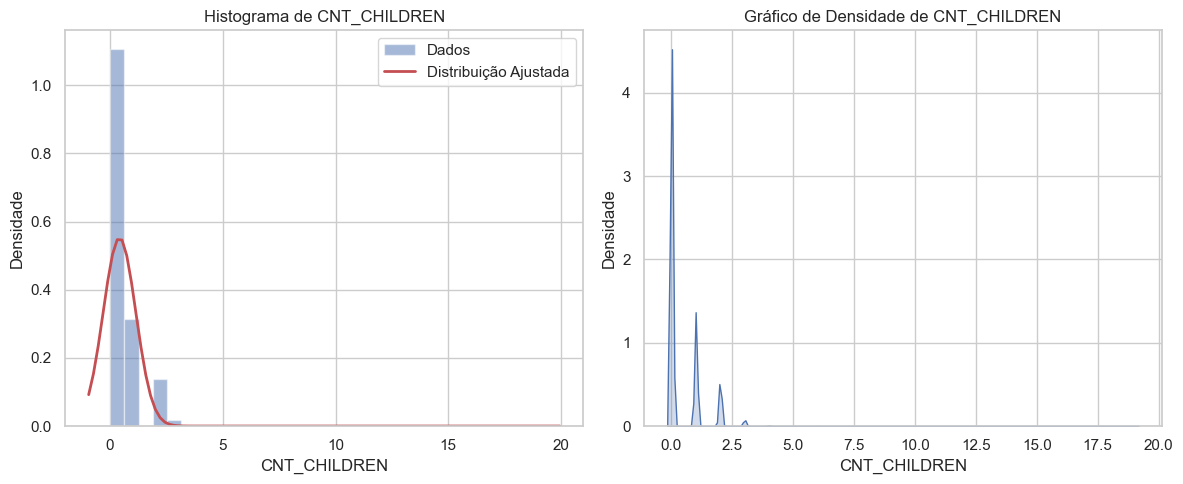

Estatísticas Descritivas para CNT_CHILDREN:
count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

Analisando os dados nulos para CNT_CHILDREN:
Número de valores nulos: 0
Porcentagem de valores nulos: 0.00%

Análise de CNT_FAM_MEMBERS:
Melhor distribuição para CNT_FAM_MEMBERS: norm com parâmetros (2.152665450442101, 0.9106800884383927)


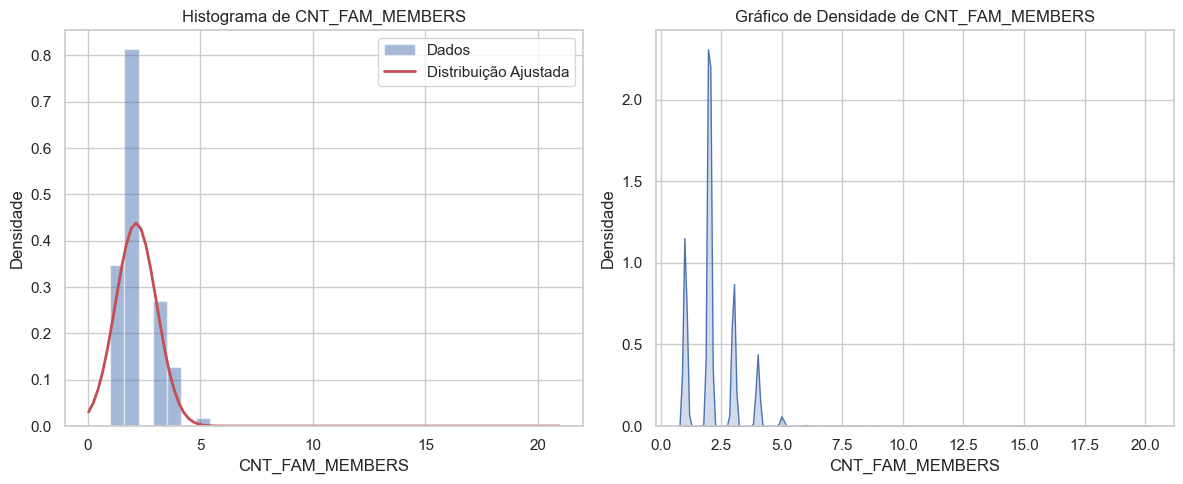

Estatísticas Descritivas para CNT_FAM_MEMBERS:
count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

Analisando os dados nulos para CNT_FAM_MEMBERS:
Número de valores nulos: 2
Porcentagem de valores nulos: 0.00%
Tratamentos Concluídos!


In [3]:
print('Análises de Distribuição das colunas AMT_CREDIT, AMT_INCOME_TOTAL, CNT_CHILDREN, CNT_FAM_MEMBERS: ')

colunas_selecionadas = ['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS']

# Execução do teste para cada coluna selecionada
for coluna in colunas_selecionadas:
    print(f'\nAnálise de {coluna}:')
    testar_distribuicao(data, coluna)

print('Tratamentos Concluídos!')

Análises de Distribuição das colunas DAYS_BIRTH, DAYS_EMPLOYED, EXT_SOURCE_2, AMT_ANNUITY, AMT_GOODS_PRICE, DAYS_REGISTRATION: 

Análise de DAYS_BIRTH:


C:\Users\amand\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6471: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


Melhor distribuição para DAYS_BIRTH: norm com parâmetros (-16036.995066843137, 4363.981536117146)


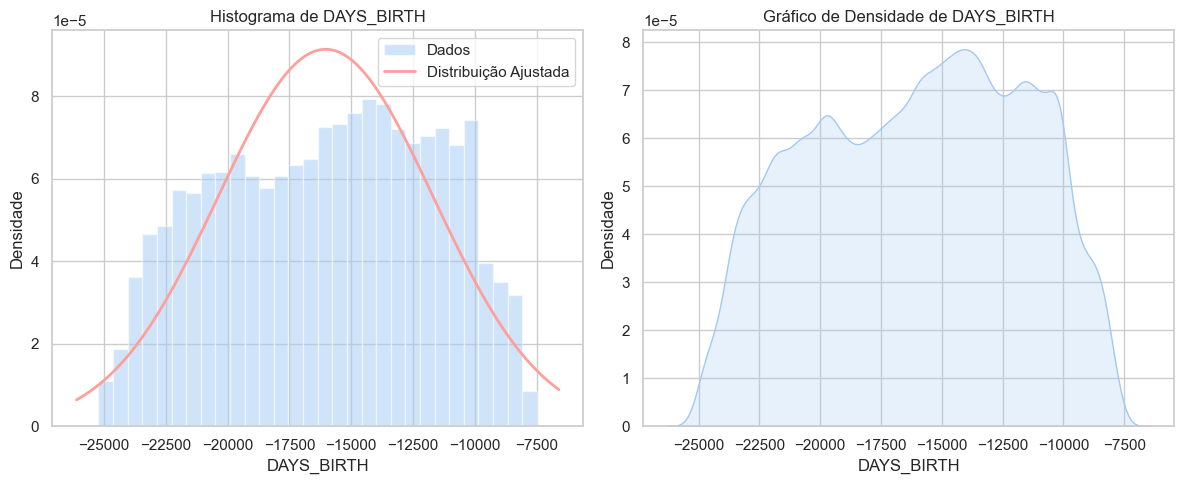

Estatísticas Descritivas para DAYS_BIRTH:
count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

Analisando os dados nulos para DAYS_BIRTH:
Número de valores nulos: 0
Porcentagem de valores nulos: 0.00%

Análise de DAYS_EMPLOYED:


C:\Users\amand\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6471: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


Melhor distribuição para DAYS_EMPLOYED: lognorm com parâmetros (1.2506601939565036, -17912.567426842812, 27303.182909752428)


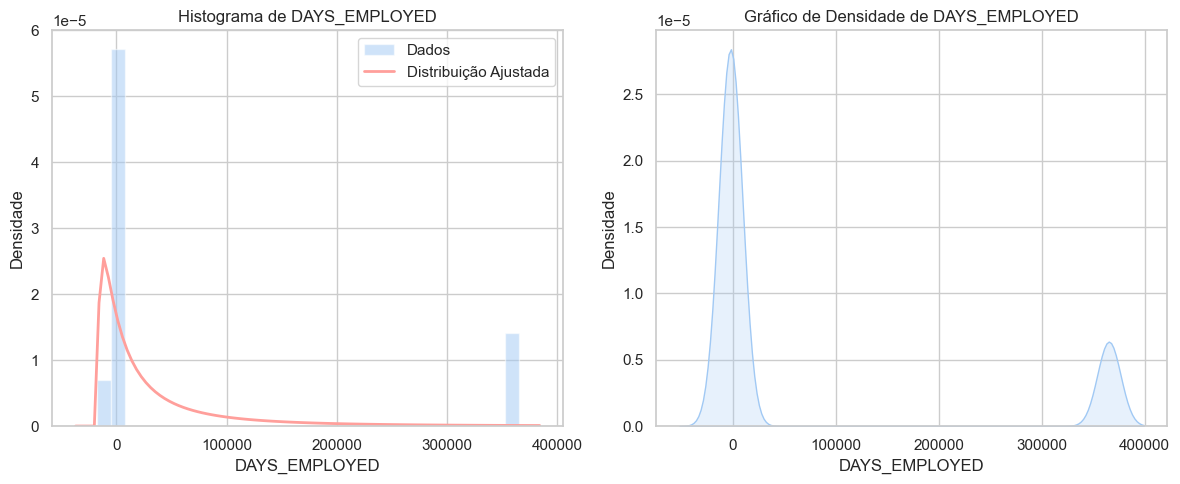

Estatísticas Descritivas para DAYS_EMPLOYED:
count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Analisando os dados nulos para DAYS_EMPLOYED:
Número de valores nulos: 0
Porcentagem de valores nulos: 0.00%

Análise de EXT_SOURCE_2:
Melhor distribuição para EXT_SOURCE_2: norm com parâmetros (0.5143926741308464, 0.19105984366069345)


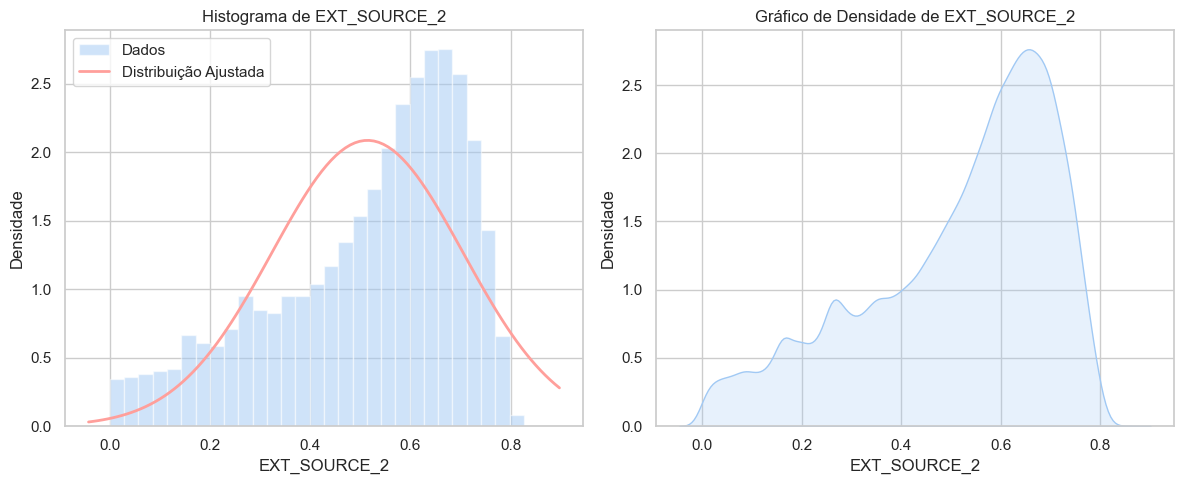

Estatísticas Descritivas para EXT_SOURCE_2:
count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

Analisando os dados nulos para EXT_SOURCE_2:
Número de valores nulos: 660
Porcentagem de valores nulos: 0.21%

Análise de AMT_ANNUITY:
Melhor distribuição para AMT_ANNUITY: lognorm com parâmetros (0.4309085747306475, -5363.0831934589, 29616.05531571018)


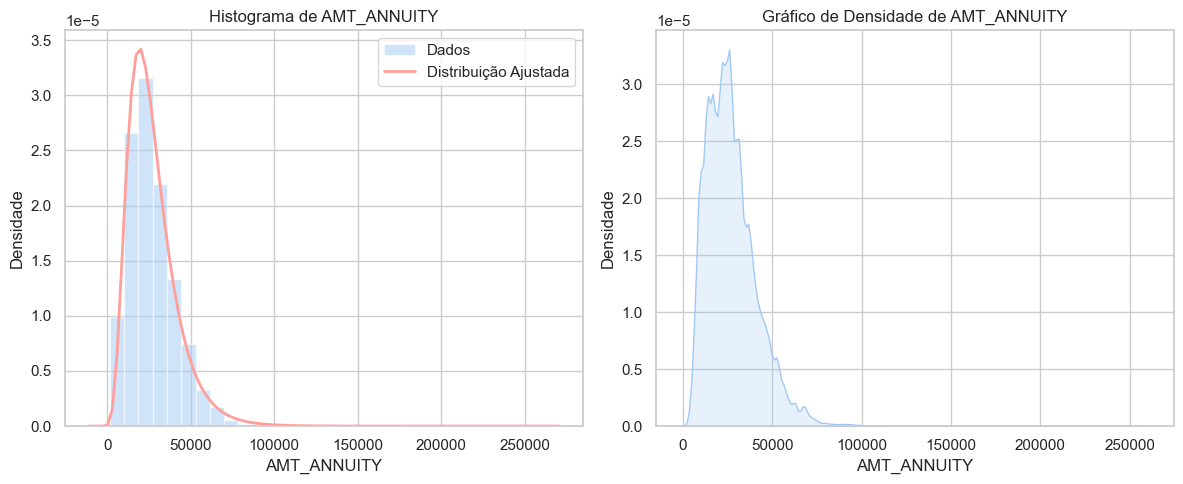

Estatísticas Descritivas para AMT_ANNUITY:
count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

Analisando os dados nulos para AMT_ANNUITY:
Número de valores nulos: 12
Porcentagem de valores nulos: 0.00%

Análise de AMT_GOODS_PRICE:
Melhor distribuição para AMT_GOODS_PRICE: gamma com parâmetros (1.8302625008013889, 37941.081073818605, 273433.52451937087)


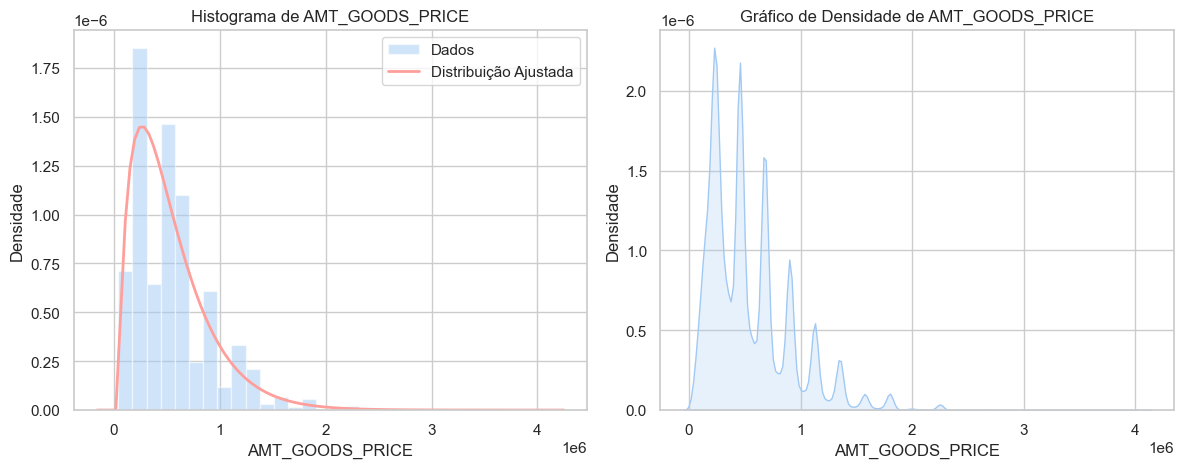

Estatísticas Descritivas para AMT_GOODS_PRICE:
count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

Analisando os dados nulos para AMT_GOODS_PRICE:
Número de valores nulos: 278
Porcentagem de valores nulos: 0.09%

Análise de DAYS_REGISTRATION:


C:\Users\amand\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6471: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


Melhor distribuição para DAYS_REGISTRATION: norm com parâmetros (-4986.120327538419, 3522.8805928928805)


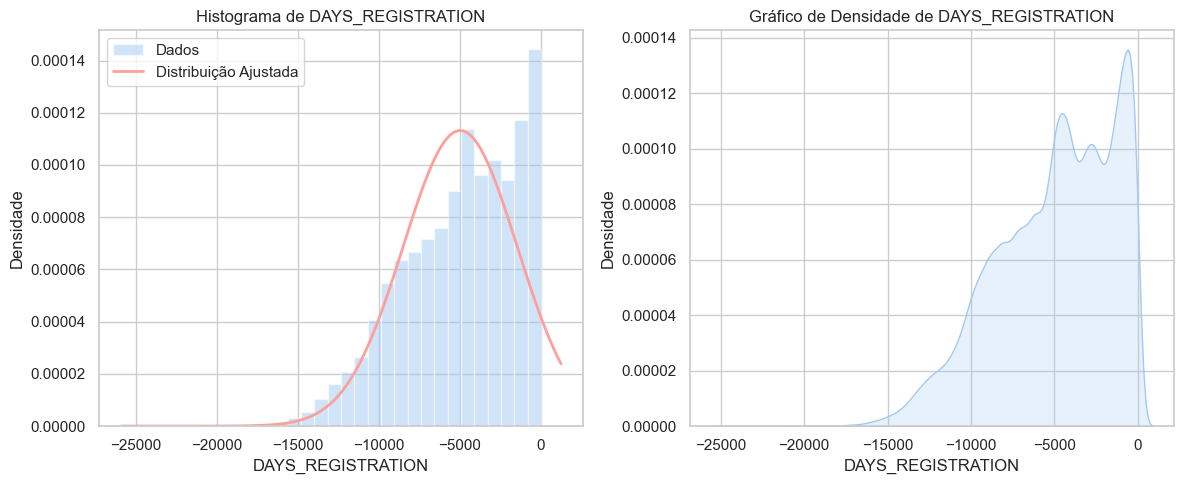

Estatísticas Descritivas para DAYS_REGISTRATION:
count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

Analisando os dados nulos para DAYS_REGISTRATION:
Número de valores nulos: 0
Porcentagem de valores nulos: 0.00%
Tratamentos Concluídos!


In [9]:
print('Análises de Distribuição das colunas DAYS_BIRTH, DAYS_EMPLOYED, EXT_SOURCE_2, AMT_ANNUITY, AMT_GOODS_PRICE, DAYS_REGISTRATION: ')

colunas_selecionadas = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_2','AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_REGISTRATION']

# Execução do teste para cada coluna selecionada
for coluna in colunas_selecionadas:
    print(f'\nAnálise de {coluna}:')
    testar_distribuicao(data, coluna)

print('Tratamentos Concluídos!')

Análises de Distribuição das colunas de probabilidade TARGET: 


C:\Users\amand\AppData\Local\Temp\ipykernel_12936\690706022.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes, order=value_counts.index, palette="pastel")


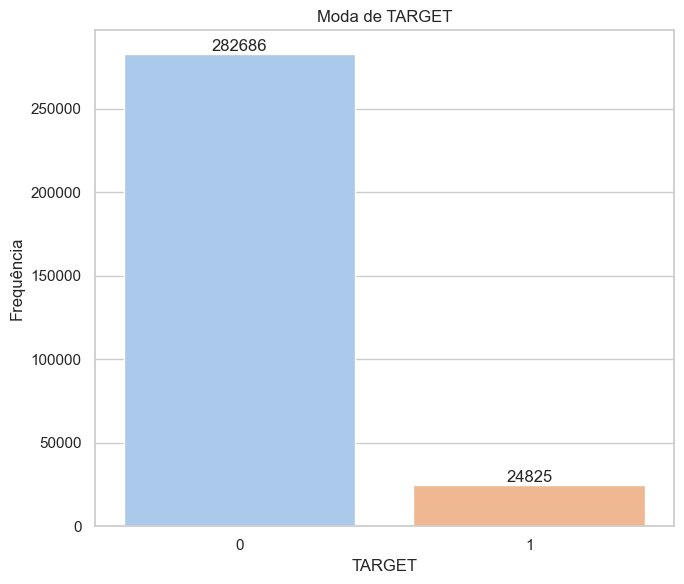

Estatísticas Descritivas: 
              TARGET
count  307511.000000
mean        0.080729
std         0.272419
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Analisando os dados nulos: 
        Número de valores nulos  Porcentagem de valores nulos
TARGET                        0                           0.0


In [10]:
print('Análises de Distribuição das colunas de probabilidade TARGET: ')

# Configurar estilo do seaborn e paleta de cores
sns.set(style="whitegrid", palette="pastel")

# Supondo que df seja o DataFrame original
df_06 = data[['TARGET']]

# Plotar gráfico de barras para verificar a moda
fig, axes = plt.subplots(1, 1, figsize=(7, 6))  # Ajustar o tamanho da figura

# Calcular a moda e plotar o gráfico de barras
value_counts = df_06['TARGET'].value_counts().sort_values(ascending=False)

# Gráfico de barras com paleta de cores pastel
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes, order=value_counts.index, palette="pastel")
axes.set_title(f'Moda de TARGET')
axes.set_xlabel('TARGET')
axes.set_ylabel('Frequência')

# Adicionar legendas em cada barra
for index, value in enumerate(value_counts):
    axes.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

print('Estatísticas Descritivas: ')
print(df_06.describe())

print('Analisando os dados nulos: ')

def analisar_dados_nulos(df):
    null_counts = df.isnull().sum()
    null_percentages = 100 * df.isnull().mean()
    null_summary = pd.DataFrame({
        'Número de valores nulos': null_counts,
        'Porcentagem de valores nulos': null_percentages
    })
    print(null_summary)

analisar_dados_nulos(df_06)


Análises de Distribuição das colunas de probabilidade FLAG_PHONE, REGION_RATING_CLIENT: 


C:\Users\amand\AppData\Local\Temp\ipykernel_12936\952300625.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], order=value_counts.index, palette="pastel")
C:\Users\amand\AppData\Local\Temp\ipykernel_12936\952300625.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], order=value_counts.index, palette="pastel")


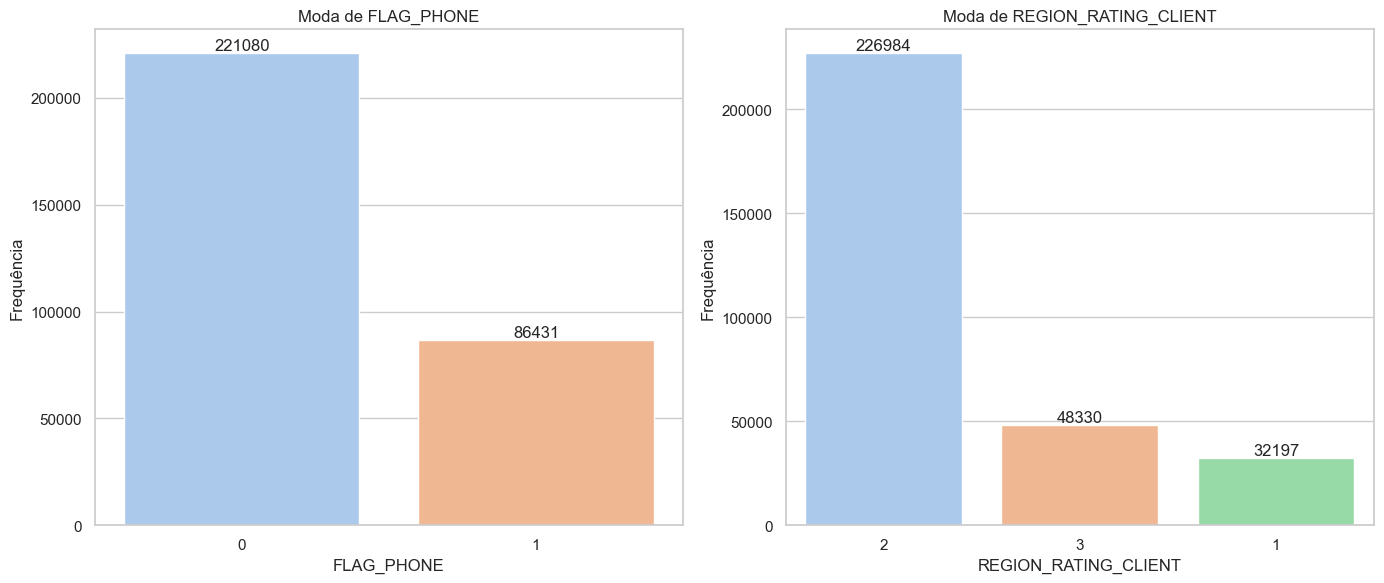

Estatísticas Descritivas: 
          FLAG_PHONE  REGION_RATING_CLIENT
count  307511.000000         307511.000000
mean        0.281066              2.052463
std         0.449521              0.509034
min         0.000000              1.000000
25%         0.000000              2.000000
50%         0.000000              2.000000
75%         1.000000              2.000000
max         1.000000              3.000000
Analisando os dados nulos: 
                      Número de valores nulos  Porcentagem de valores nulos
FLAG_PHONE                                  0                           0.0
REGION_RATING_CLIENT                        0                           0.0


In [11]:
print('Análises de Distribuição das colunas de probabilidade FLAG_PHONE, REGION_RATING_CLIENT: ')

# Configurar estilo do seaborn e paleta de cores
sns.set(style="whitegrid", palette="pastel")

# Supondo que df seja o DataFrame original
df_05 = data[['FLAG_PHONE','REGION_RATING_CLIENT']]

# Plotar gráficos de barras para verificar a moda
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Ajustar o tamanho da figura

for i, col in enumerate(['FLAG_PHONE','REGION_RATING_CLIENT']):
    value_counts = df_05[col].value_counts().sort_values(ascending=False)
    
    # Gráfico de barras com paleta de cores pastel
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], order=value_counts.index, palette="pastel")
    axes[i].set_title(f'Moda de {col}')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Frequência')
    
    # Adicionar legendas em cada barra
    for index, value in enumerate(value_counts):
        axes[i].text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

print('Estatísticas Descritivas: ')
print(df_05.describe())

print('Analisando os dados nulos: ')

def analisar_dados_nulos(df):
    null_counts = df.isnull().sum()
    null_percentages = 100 * df.isnull().mean()
    null_summary = pd.DataFrame({
        'Número de valores nulos': null_counts,
        'Porcentagem de valores nulos': null_percentages
    })
    print(null_summary)

analisar_dados_nulos(df_05)

### Passo 2: Escolha da Distribuição Teórica
  
Com base na visualização, você pode escolher distribuições teóricas que possam ser adequadas para seus dados. Alguns exemplos comuns incluem distribuições normais, exponenciais, log-normais, entre outras, dependendo da forma dos seus dados.

## Passo 2: Ajuste de Distribuições Teóricas

Agora, vamos ajustar distribuições teóricas aos dados usando a função fit do scipy.stats.

In [16]:
import pandas as pd
import numpy as np
from scipy import stats

# Definir distribuições para ajuste
distributions = ['norm', 'expon', 'gamma', 'lognorm']
params = {}

# Colunas selecionadas para análise
#colunas_selecionadas = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_2', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_REGISTRATION']
colunas_selecionadas = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_2', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'DAYS_REGISTRATION', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
                        'FLAG_PHONE', 'REGION_RATING_CLIENT', 'TARGET']

# Listas para armazenar resultados
results = []

# Ajuste das distribuições e armazenamento dos resultados
for col in colunas_selecionadas:
    print(f'\nAjuste da distribuição para {col}:')
    best_fit_name, best_fit_params = None, None
    best_ad_stat = np.inf  # Inicializa o melhor valor de estatística de aderência
    
    for dist_name in distributions:
        # Ajuste da distribuição
        dist = getattr(stats, dist_name)
        dist_params = dist.fit(data[col].dropna())
        
        # Teste de aderência usando Kolmogorov-Smirnov
        ad_stat, ad_pvalue = stats.kstest(data[col].dropna(), dist_name, args=dist_params)
        
        print(f'{dist_name}: Estatística KS = {ad_stat}, p-valor = {ad_pvalue}')
        
        # Seleciona a melhor distribuição com base na estatística KS
        if ad_stat < best_ad_stat:
            best_ad_stat = ad_stat
            best_fit_name = dist_name
            best_fit_params = dist_params
    
    # Armazena os parâmetros da melhor distribuição
    params[col] = (best_fit_name, best_fit_params)
    
    # Adiciona os resultados à lista
    results.append([col, best_fit_name, best_fit_params, best_ad_stat, ad_pvalue])
    
    print(f'Melhor distribuição para {col}: {best_fit_name} com parâmetros {best_fit_params}')

# Cria um DataFrame com os resultados
df_results = pd.DataFrame(results, columns=['Variável', 'Melhor Distribuição', 'Parâmetros', 'Estatística KS', 'p-valor'])

# Exibe a tabela
print("\nTabela com as análises gerais:")
print(df_results)



Ajuste da distribuição para DAYS_BIRTH:
norm: Estatística KS = 0.04858248646290003, p-valor = 0.0
expon: Estatística KS = 0.2059702441911592, p-valor = 0.0
gamma: Estatística KS = 0.05042129666859152, p-valor = 0.0


C:\Users\amand\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6471: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


lognorm: Estatística KS = 0.7817477208606001, p-valor = 0.0
Melhor distribuição para DAYS_BIRTH: norm com parâmetros (-16036.995066843137, 4363.981536117146)

Ajuste da distribuição para DAYS_EMPLOYED:
norm: Estatística KS = 0.49418809278454434, p-valor = 0.0
expon: Estatística KS = 0.6231545989701717, p-valor = 0.0
gamma: Estatística KS = 0.4861559545159027, p-valor = 0.0
lognorm: Estatística KS = 0.45211032573786253, p-valor = 0.0
Melhor distribuição para DAYS_EMPLOYED: lognorm com parâmetros (1.2506601939565036, -17912.567426842812, 27303.182909752428)

Ajuste da distribuição para EXT_SOURCE_2:
norm: Estatística KS = 0.1069081309898901, p-valor = 0.0
expon: Estatística KS = 0.28437229722556556, p-valor = 0.0
gamma: Estatística KS = 0.12435375263632492, p-valor = 0.0
lognorm: Estatística KS = 0.1069098617643926, p-valor = 0.0
Melhor distribuição para EXT_SOURCE_2: norm com parâmetros (0.5143926741308464, 0.19105984366069345)

Ajuste da distribuição para AMT_ANNUITY:
norm: Estatística

C:\Users\amand\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6480: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
C:\Users\amand\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


lognorm: Estatística KS = 0.44383808860992374, p-valor = 0.0
Melhor distribuição para CNT_CHILDREN: norm com parâmetros (0.4170517477423572, 0.7221202102975595)

Ajuste da distribuição para CNT_FAM_MEMBERS:
norm: Estatística KS = 0.302167569416475, p-valor = 0.0
expon: Estatística KS = 0.3593884222347199, p-valor = 0.0
gamma: Estatística KS = 0.5431639740990893, p-valor = 0.0
lognorm: Estatística KS = 0.47529027223077847, p-valor = 0.0
Melhor distribuição para CNT_FAM_MEMBERS: norm com parâmetros (2.152665450442101, 0.9106800884383927)

Ajuste da distribuição para FLAG_PHONE:
norm: Estatística KS = 0.4530331315596238, p-valor = 0.0
expon: Estatística KS = 0.7189336316424453, p-valor = 0.0
gamma: Estatística KS = 0.7189336287213042, p-valor = 0.0
lognorm: Estatística KS = 0.4530331315596238, p-valor = 0.0
Melhor distribuição para FLAG_PHONE: norm com parâmetros (0.28106636835755466, 0.44951981595459173)

Ajuste da distribuição para REGION_RATING_CLIENT:
norm: Estatística KS = 0.38387894

In [18]:
import pandas as pd
import numpy as np
from scipy import stats

# Definir distribuições para ajuste
distributions_continuous = ['norm', 'expon', 'gamma', 'lognorm']
distributions_discrete = ['binom']

# Função para ajustar distribuições contínuas
def fit_continuous(data, col):
    best_fit_name, best_fit_params = None, None
    best_ad_stat = np.inf  # Inicializa o melhor valor de estatística de aderência

    for dist_name in distributions_continuous:
        # Ajuste da distribuição
        dist = getattr(stats, dist_name)
        dist_params = dist.fit(data[col].dropna())

        # Teste de aderência usando Kolmogorov-Smirnov
        ad_stat, ad_pvalue = stats.kstest(data[col].dropna(), dist_name, args=dist_params)

        # Seleciona a melhor distribuição com base na estatística KS
        if ad_stat < best_ad_stat:
            best_ad_stat = ad_stat
            best_fit_name = dist_name
            best_fit_params = dist_params

    return best_fit_name, best_fit_params, best_ad_stat, ad_pvalue

# Função para ajustar distribuições discretas
def fit_discrete(data, col):
    best_fit_name, best_fit_params = None, None
    best_ad_stat = np.inf  # Inicializa o melhor valor de estatística de aderência

    # Ajuste da distribuição binomial
    dist_name = 'binom'
    n = data[col].max()  # Número de tentativas (para binomial)
    p = data[col].mean() / n  # Probabilidade de sucesso
    dist_params = (n, p)

    # Teste de aderência usando Chi-Square
    observed_freq = data[col].value_counts().sort_index()
    expected_freq = stats.binom.pmf(observed_freq.index, n, p) * len(data[col])
    chi_stat = ((observed_freq - expected_freq) ** 2 / expected_freq).sum()
    ad_stat = chi_stat
    ad_pvalue = 1 - stats.chi2.cdf(chi_stat, df=len(observed_freq) - 1)

    # Seleciona a melhor distribuição com base na estatística Chi-Square
    if ad_stat < best_ad_stat:
        best_ad_stat = ad_stat
        best_fit_name = dist_name
        best_fit_params = dist_params

    return best_fit_name, best_fit_params, best_ad_stat, ad_pvalue

# Colunas selecionadas para análise
colunas_selecionadas = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_2', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'DAYS_REGISTRATION', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
                        'FLAG_PHONE', 'REGION_RATING_CLIENT', 'TARGET']

# Listas para armazenar resultados
results = []

# Ajuste das distribuições e armazenamento dos resultados
for col in colunas_selecionadas:
    print(f'\nAjuste da distribuição para {col}:')
    
    # Verifica se a variável é contínua ou discreta
    if data[col].dtype in ['float64', 'int64'] and len(data[col].unique()) > 10:
        best_fit_name, best_fit_params, best_ad_stat, ad_pvalue = fit_continuous(data, col)
    else:
        best_fit_name, best_fit_params, best_ad_stat, ad_pvalue = fit_discrete(data, col)
    
    # Adiciona os resultados à lista
    results.append([col, best_fit_name, best_fit_params, best_ad_stat, ad_pvalue])
    
    print(f'Melhor distribuição para {col}: {best_fit_name} com parâmetros {best_fit_params}')

# Cria um DataFrame com os resultados
df_results = pd.DataFrame(results, columns=['Variável', 'Melhor Distribuição', 'Parâmetros', 'Estatística KS', 'p-valor'])

# Exibe a tabela
print("\nTabela com as análises gerais:")
print(df_results)



Ajuste da distribuição para DAYS_BIRTH:


C:\Users\amand\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6471: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


Melhor distribuição para DAYS_BIRTH: norm com parâmetros (-16036.995066843137, 4363.981536117146)

Ajuste da distribuição para DAYS_EMPLOYED:
Melhor distribuição para DAYS_EMPLOYED: lognorm com parâmetros (1.2506601939565036, -17912.567426842812, 27303.182909752428)

Ajuste da distribuição para EXT_SOURCE_2:
Melhor distribuição para EXT_SOURCE_2: norm com parâmetros (0.5143926741308464, 0.19105984366069345)

Ajuste da distribuição para AMT_ANNUITY:
Melhor distribuição para AMT_ANNUITY: lognorm com parâmetros (0.4309085747306475, -5363.0831934589, 29616.05531571018)

Ajuste da distribuição para AMT_GOODS_PRICE:
Melhor distribuição para AMT_GOODS_PRICE: gamma com parâmetros (1.8302625008013889, 37941.081073818605, 273433.52451937087)

Ajuste da distribuição para DAYS_REGISTRATION:
Melhor distribuição para DAYS_REGISTRATION: norm com parâmetros (-4986.120327538419, 3522.8805928928805)

Ajuste da distribuição para AMT_CREDIT:
Melhor distribuição para AMT_CREDIT: gamma com parâmetros (1.875

C:\Users\amand\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6480: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
C:\Users\amand\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Melhor distribuição para CNT_CHILDREN: norm com parâmetros (0.4170517477423572, 0.7221202102975595)

Ajuste da distribuição para CNT_FAM_MEMBERS:
Melhor distribuição para CNT_FAM_MEMBERS: norm com parâmetros (2.152665450442101, 0.9106800884383927)

Ajuste da distribuição para FLAG_PHONE:
Melhor distribuição para FLAG_PHONE: binom com parâmetros (1, 0.28106636835755466)

Ajuste da distribuição para REGION_RATING_CLIENT:
Melhor distribuição para REGION_RATING_CLIENT: binom com parâmetros (3, 0.6841543879731131)

Ajuste da distribuição para TARGET:
Melhor distribuição para TARGET: binom com parâmetros (1, 0.08072881945686496)

Tabela com as análises gerais:
                Variável Melhor Distribuição  \
0             DAYS_BIRTH                norm   
1          DAYS_EMPLOYED             lognorm   
2           EXT_SOURCE_2                norm   
3            AMT_ANNUITY             lognorm   
4        AMT_GOODS_PRICE               gamma   
5      DAYS_REGISTRATION                norm   
6

## Passo 3: Teste de Qui-Quadrado - Para variáveis binomiais (distribuições discretas)
#### Colunas FLAG_PHONE e REGION_RATING_CLIENT

Finalmente, faremos o teste de aderência usando o teste qui-quadrado para a melhor distribuição ajustada.
É adequado para verificar a aderência de uma distribuição de frequências observadas a uma distribuição teórica discreta. Amplamente utilizado para distribuições binomiais, pois testa se as frequências observadas se desviam significativamente das frequências esperadas.

Análise da coluna FLAG_PHONE:
Número de observações: 307511
Frequência observada: {0: 221080, 1: 86431}
Frequência esperada: [221080.0, 86430.99999999999]
Estatística de Qui-Quadrado: 2.4500264582565876e-27
Valor-p: 0.9999999999999605


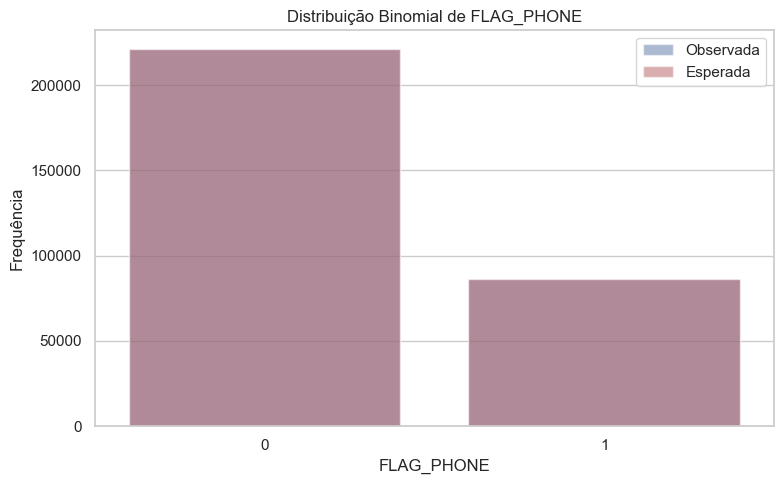

Resultados da Análise Binomial para FLAG_PHONE:
Probabilidade de sucesso (p): 0.28106636835755466
Valor-p: 0.9999999999999605


In [113]:
# Configuração do estilo do seaborn
sns.set(style="whitegrid")

# Função para analisar a distribuição binomial
def testar_distribuicao_binomial(df, coluna):
    # Seleciona os dados da coluna
    dados = df[coluna].dropna()
    
    # Verificar a frequência de valores 0 e 1
    freq = dados.value_counts().sort_index()
    n = len(dados)
    p = freq[1] / n  # Probabilidade de sucesso (valor 1)
    
    # Frequência esperada
    expected_freq = [n * (1 - p), n * p]
    
    # Teste de aderência usando Qui-Quadrado
    chi2_stat, p_val = stats.chisquare(f_obs=freq, f_exp=expected_freq)
    
    print(f'Análise da coluna {coluna}:')
    print(f'Número de observações: {n}')
    print(f'Frequência observada: {freq.to_dict()}')
    print(f'Frequência esperada: {expected_freq}')
    print(f'Estatística de Qui-Quadrado: {chi2_stat}')
    print(f'Valor-p: {p_val}')
    
    # Plotagem da distribuição observada e esperada
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Frequência observada
    sns.barplot(x=freq.index, y=freq.values, alpha=0.5, color='b', label='Observada', ax=ax)
    
    # Frequência esperada
    sns.barplot(x=[0, 1], y=expected_freq, alpha=0.5, color='r', label='Esperada', ax=ax)
    
    ax.set_title(f'Distribuição Binomial de {coluna}')
    ax.set_xlabel(coluna)
    ax.set_ylabel('Frequência')
    ax.legend()
    
    plt.tight_layout()
    plt.show()
    
    return p, p_val

# Executar a análise para a coluna FLAG_PHONE
coluna_flag_phone = 'FLAG_PHONE'
probabilidade, valor_p = testar_distribuicao_binomial(data, coluna_flag_phone)

# Exibir os resultados
print("Resultados da Análise Binomial para FLAG_PHONE:")
print(f"Probabilidade de sucesso (p): {probabilidade}")
print(f"Valor-p: {valor_p}")



Análise da coluna REGION_RATING_CLIENT:
Número de observações: 307511
Frequência observada: {1: 32197, 2: 226984, 3: 48330}
Frequência esperada: [32197.0, 226984.0, 48330.0]
Estatística de Qui-Quadrado: 0.0
Valor-p: 1.0


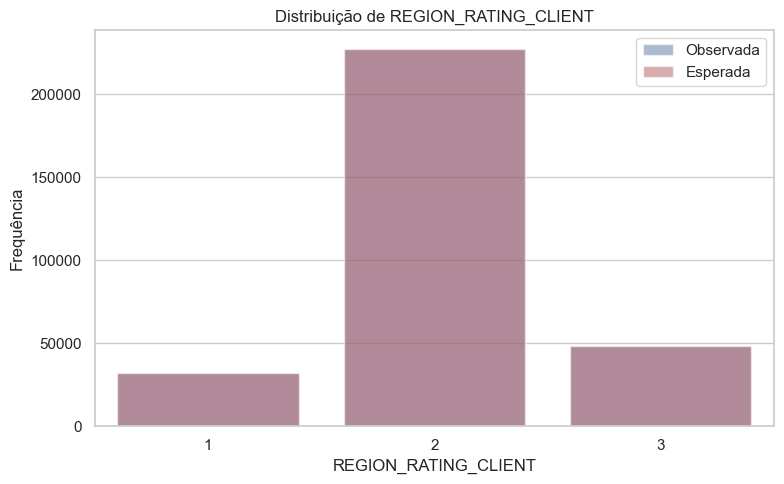

Resultados da Análise para REGION_RATING_CLIENT:
Probabilidades: [0.10470194562145745, 0.7381329448377456, 0.1571651095407969]
Valor-p: 1.0


In [36]:
# Função modificada para analisar a distribuição binomial de qualquer coluna
def testar_distribuicao_binomial_qualquer(df, coluna):
    # Seleciona os dados da coluna
    dados = df[coluna].dropna()
    
    # Verificar a frequência dos valores únicos
    freq = dados.value_counts().sort_index()
    n = len(dados)
    
    # Calcula as frequências esperadas para cada valor observado
    p = [freq[val] / n for val in freq.index]
    expected_freq = [n * prob for prob in p]
    
    # Teste de aderência usando Qui-Quadrado
    chi2_stat, p_val = stats.chisquare(f_obs=freq, f_exp=expected_freq)
    
    print(f'Análise da coluna {coluna}:')
    print(f'Número de observações: {n}')
    print(f'Frequência observada: {freq.to_dict()}')
    print(f'Frequência esperada: {expected_freq}')
    print(f'Estatística de Qui-Quadrado: {chi2_stat}')
    print(f'Valor-p: {p_val}')
    
    # Plotagem da distribuição observada e esperada
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Frequência observada
    sns.barplot(x=freq.index, y=freq.values, alpha=0.5, color='b', label='Observada', ax=ax)
    
    # Frequência esperada
    sns.barplot(x=freq.index, y=expected_freq, alpha=0.5, color='r', label='Esperada', ax=ax)
    
    ax.set_title(f'Distribuição de {coluna}')
    ax.set_xlabel(coluna)
    ax.set_ylabel('Frequência')
    ax.legend()
    
    plt.tight_layout()
    plt.show()
    
    return p, p_val

# Executar a análise para a coluna REGION_RATING_CLIENT
coluna_region_rating_client = 'REGION_RATING_CLIENT'
probabilidade_region, valor_p_region = testar_distribuicao_binomial_qualquer(data, coluna_region_rating_client)

# Exibir os resultados
print("Resultados da Análise para REGION_RATING_CLIENT:")
print(f"Probabilidades: {probabilidade_region}")
print(f"Valor-p: {valor_p_region}")

Análise da coluna TARGET:
Número de observações: 307511
Frequência observada: {0: 282686, 1: 24825}
Frequência esperada: [282686.  24825.]
Estatística de Qui-Quadrado: 0.0
Valor-p: 1.0


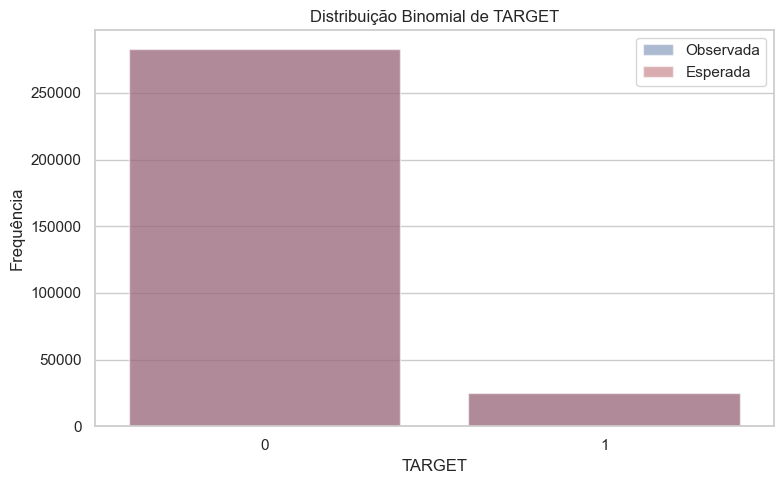

Resultados do Teste Qui-Quadrado para TARGET:
Probabilidade de sucesso (p): 0.08072881945686496
Valor-p: 1.0


In [37]:
# Executar a análise para a coluna TARGET
coluna_target = 'TARGET'
n_target = 1
p_target = 0.08072881945686496
probabilidade_target, valor_p_target = testar_distribuicao_binomial_chi2(data, coluna_target, n_target, p_target)

# Exibir os resultados
print("Resultados do Teste Qui-Quadrado para TARGET:")
print(f"Probabilidade de sucesso (p): {probabilidade_target}")
print(f"Valor-p: {valor_p_target}")


#### Outras colunas

Para cada variável da tabela, o teste mais apropriado depende da distribuição que foi identificada como melhor ajuste. Por exemplo:

- DAYS_BIRTH, DAYS_REGISTRATION, CNT_CHILDREN, CNT_FAM_MEMBERS: Poderiam ser testados com o teste de Kolmogorov-Smirnov para verificar aderência à distribuição normal.
  
- DAYS_EMPLOYED, AMT_ANNUITY, AMT_GOODS_PRICE, AMT_CREDIT, AMT_INCOME_TOTAL: Poderiam ser testados com o teste de Anderson-Darling ou KS para distribuições lognormais ou gamma.

- EXT_SOURCE_2: Poderia ser testado com o teste de Kolmogorov-Smirnov para verificar aderência à distribuição normal.
A escolha entre esses testes pode depender da sensibilidade necessária para caudas da distribuição, tamanho da amostra e tipo de distribuição teórica a ser testada. É importante ajustar os parâmetros de cada teste de acordo com as características específicas dos dados e distribuições teóricas em questão.

## Passo 3: Teste de Qui-Quadrado

#### Teste de Kolmogorov-Smirnov (KS)

O teste de Kolmogorov-Smirnov é utilizado para verificar se uma amostra segue uma distribuição específica, como a distribuição normal no caso das variáveis mencionadas. Ele compara a função de distribuição acumulada (CDF) empírica dos dados com a CDF teórica da distribuição de interesse.

##### Passos para aplicação do teste:

##### Hipóteses Nulas e Alternativas:

- Hipótese Nula (H0): Os dados seguem a distribuição normal especificada.
- Hipótese Alternativa (H1): Os dados não seguem a distribuição normal especificada.

##### Estatística de Teste:

- A estatística de teste do KS é baseada na máxima diferença absoluta entre a CDF empírica dos dados observados e a CDF teórica da distribuição normal.

##### Interpretação do Resultado:

- Um valor-p menor que um nível de significância (geralmente 0,05) leva à rejeição da hipótese nula, indicando que os dados não seguem a distribuição normal.
- Um valor-p maior que o nível de significância não fornece evidências suficientes para rejeitar a hipótese nula, sugerindo que os dados podem seguir a distribuição normal.

##### Outras Observações:
Com base no resultado do teste de Anderson-Darling para a coluna em questao, onde a estatística Anderson-Darling é significativamente maior que os valores críticos para os níveis de significância usuais, rejeitamos a hipótese nula de que os dados seguem uma distribuição normal. Isso indica que a distribuição dos dados não é normal.

Dado que a distribuição normal não é adequada para modelar esses dados, podemos considerar outras distribuições estatísticas que podem se ajustar melhor aos dados observados. Algumas alternativas comuns incluem:

1. Distribuição Log-Normal
A distribuição log-normal é frequentemente utilizada para modelar variáveis que são o logaritmo de uma variável normalmente distribuída. Ela é caracterizada por ter valores positivos e uma assimetria positiva (cauda direita).

2. Distribuição Gama
A distribuição gama é adequada para variáveis que são estritamente positivas e possuem uma forma que pode ser ajustada tanto para caudas longas quanto curtas, dependendo dos parâmetros.

3. Distribuição Weibull
A distribuição Weibull é comumente usada para modelar tempos de vida e tem uma forma flexível que pode acomodar uma ampla gama de distribuições, incluindo distribuições com caudas curtas ou longas.

4. Distribuição Exponencial
A distribuição exponencial é útil para modelar o tempo entre eventos em um processo de Poisson, mas também pode ser considerada para outras variáveis com distribuição de cauda única.

In [51]:
print('Coluna CNT_FAM_MEMBERS:')

# Exemplo de aplicação para DAYS_BIRTH (supondo dados em 'data' e coluna 'DAYS_BIRTH')
dados = data['CNT_FAM_MEMBERS']
mu, std = np.mean(dados), np.std(dados)

# Calculando a estatística KS e o valor-p
ks_stat, p_value = stats.kstest(dados, 'norm', args=(mu, std))

# Interpretando os resultados
print(f'Estatística KS: {ks_stat}')
print(f'Valor-p: {p_value}')

# Conclusão
alpha = 0.05
if p_value < alpha:
    print("Rejeitar H0: Os dados não seguem uma distribuição normal.")
else:
    print("Não rejeitar H0: Os dados seguem uma distribuição normal.")


Coluna CNT_FAM_MEMBERS:
Estatística KS: nan
Valor-p: nan
Não rejeitar H0: Os dados seguem uma distribuição normal.


In [60]:
print('Coluna DAYS_BIRTH:')

# Exemplo de aplicação para DAYS_BIRTH (supondo dados em 'data' e coluna 'DAYS_BIRTH')
dados = data['DAYS_BIRTH']

# Transformando os dados para a distribuição log-normal
dados_log = np.log(dados)
mu_log, std_log = np.mean(dados_log), np.std(dados_log)

# Calculando a estatística KS e o valor-p para log-normal
ks_stat, p_value = stats.kstest(dados_log, 'norm', args=(mu_log, std_log))

# Interpretando os resultados
print(f'Estatística KS para Log-Normal: {ks_stat}')
print(f'Valor-p para Log-Normal: {p_value}')

# Conclusão
alpha = 0.05
if p_value < alpha:
    print("Rejeitar H0: Os dados não seguem uma distribuição log-normal.")
else:
    print("Não rejeitar H0: Os dados seguem uma distribuição log-normal.")


Coluna DAYS_BIRTH:
Estatística KS para Log-Normal: nan
Valor-p para Log-Normal: nan
Não rejeitar H0: Os dados seguem uma distribuição log-normal.


In [65]:
print('Coluna DAYS_EMPLOYED:')

# Exemplo de aplicação para DAYS_BIRTH (supondo dados em 'data' e coluna 'DAYS_BIRTH')
dados = data['DAYS_EMPLOYED']

# Transformando os dados para a distribuição log-normal
dados_log = np.log(dados)
mu_log, std_log = np.mean(dados_log), np.std(dados_log)

# Calculando a estatística KS e o valor-p para log-normal
ks_stat, p_value = stats.kstest(dados_log, 'norm', args=(mu_log, std_log))

# Interpretando os resultados
print(f'Estatística KS para Log-Normal: {ks_stat}')
print(f'Valor-p para Log-Normal: {p_value}')

# Conclusão
alpha = 0.05
if p_value < alpha:
    print("Rejeitar H0: Os dados não seguem uma distribuição log-normal.")
else:
    print("Não rejeitar H0: Os dados seguem uma distribuição log-normal.")


Coluna DAYS_EMPLOYED:
Estatística KS para Log-Normal: nan
Valor-p para Log-Normal: nan
Não rejeitar H0: Os dados seguem uma distribuição log-normal.


In [78]:
print('Coluna EXT_SOURCE_2:')

# Exemplo de aplicação para DAYS_BIRTH (supondo dados em 'data' e coluna 'DAYS_BIRTH')
dados = data['EXT_SOURCE_2']

# Transformando os dados para a distribuição log-normal
dados_log = np.log(dados)
mu_log, std_log = np.mean(dados_log), np.std(dados_log)

# Calculando a estatística KS e o valor-p para log-normal
ks_stat, p_value = stats.kstest(dados_log, 'norm', args=(mu_log, std_log))

# Interpretando os resultados
print(f'Estatística KS para Log-Normal: {ks_stat}')
print(f'Valor-p para Log-Normal: {p_value}')

# Conclusão
alpha = 0.05
if p_value < alpha:
    print("Rejeitar H0: Os dados não seguem uma distribuição log-normal.")
else:
    print("Não rejeitar H0: Os dados seguem uma distribuição log-normal.")

Coluna EXT_SOURCE_2:
Estatística KS para Log-Normal: nan
Valor-p para Log-Normal: nan
Não rejeitar H0: Os dados seguem uma distribuição log-normal.


In [77]:
print('Coluna AMT_ANNUITY:')

# Exemplo de aplicação para DAYS_BIRTH (supondo dados em 'data' e coluna 'DAYS_BIRTH')
dados = data['AMT_ANNUITY']

# Transformando os dados para a distribuição log-normal
dados_log = np.log(dados)
mu_log, std_log = np.mean(dados_log), np.std(dados_log)

# Calculando a estatística KS e o valor-p para log-normal
ks_stat, p_value = stats.kstest(dados_log, 'norm', args=(mu_log, std_log))

# Interpretando os resultados
print(f'Estatística KS para Log-Normal: {ks_stat}')
print(f'Valor-p para Log-Normal: {p_value}')

# Conclusão
alpha = 0.05
if p_value < alpha:
    print("Rejeitar H0: Os dados não seguem uma distribuição log-normal.")
else:
    print("Não rejeitar H0: Os dados seguem uma distribuição log-normal.")

Coluna AMT_ANNUITY:
Estatística KS para Log-Normal: nan
Valor-p para Log-Normal: nan
Não rejeitar H0: Os dados seguem uma distribuição log-normal.


In [88]:
print('Coluna AMT_GOODS_PRICE:')

# Exemplo de aplicação para DAYS_BIRTH (supondo dados em 'data' e coluna 'DAYS_BIRTH')
dados = data['AMT_GOODS_PRICE']

# Transformando os dados para a distribuição log-normal
dados_log = np.log(dados)
mu_log, std_log = np.mean(dados_log), np.std(dados_log)

# Calculando a estatística KS e o valor-p para log-normal
ks_stat, p_value = stats.kstest(dados_log, 'norm', args=(mu_log, std_log))

# Interpretando os resultados
print(f'Estatística KS para Log-Normal: {ks_stat}')
print(f'Valor-p para Log-Normal: {p_value}')

# Conclusão
alpha = 0.05
if p_value < alpha:
    print("Rejeitar H0: Os dados não seguem uma distribuição log-normal.")
else:
    print("Não rejeitar H0: Os dados seguem uma distribuição log-normal.")

Coluna AMT_GOODS_PRICE:
Estatística KS para Log-Normal: nan
Valor-p para Log-Normal: nan
Não rejeitar H0: Os dados seguem uma distribuição log-normal.


In [94]:
print('Coluna DAYS_REGISTRATION:')

# Exemplo de aplicação para DAYS_BIRTH (supondo dados em 'data' e coluna 'DAYS_BIRTH')
dados = data['DAYS_REGISTRATION']

# Transformando os dados para a distribuição log-normal
dados_log = np.log(dados)
mu_log, std_log = np.mean(dados_log), np.std(dados_log)

# Calculando a estatística KS e o valor-p para log-normal
ks_stat, p_value = stats.kstest(dados_log, 'norm', args=(mu_log, std_log))

# Interpretando os resultados
print(f'Estatística KS para Log-Normal: {ks_stat}')
print(f'Valor-p para Log-Normal: {p_value}')

# Conclusão
alpha = 0.05
if p_value < alpha:
    print("Rejeitar H0: Os dados não seguem uma distribuição log-normal.")
else:
    print("Não rejeitar H0: Os dados seguem uma distribuição log-normal.")


Coluna DAYS_REGISTRATION:
Estatística KS para Log-Normal: nan
Valor-p para Log-Normal: nan
Não rejeitar H0: Os dados seguem uma distribuição log-normal.


In [100]:
import numpy as np
from scipy import stats

# Exemplo de aplicação para DAYS_BIRTH (supondo dados em 'data' e coluna 'DAYS_BIRTH')
dados = data['AMT_CREDIT']

# Estimando os parâmetros da distribuição Gama usando método de momentos
shape, loc, scale = stats.gamma.fit(dados)

# Calculando a estatística KS e o valor-p
ks_stat, p_value = stats.kstest(dados, 'gamma', args=(shape, loc, scale))

# Interpretando os resultados
print('Coluna AMT_CREDIT:')
print(f'Estatística KS para Gama: {ks_stat}')
print(f'Valor-p para Gama: {p_value}')

# Nível de significância (alfa)
alpha = 0.05
if p_value < alpha:
    print("Rejeitar H0: Os dados não seguem uma distribuição Gama.")
else:
    print("Não rejeitar H0: Os dados seguem uma distribuição Gama.")


Coluna AMT_CREDIT:
Estatística KS para Gama: 0.04896654036578696
Valor-p para Gama: 0.0
Rejeitar H0: Os dados não seguem uma distribuição Gama.


In [106]:
print('Coluna AMT_INCOME_TOTAL:')

# Exemplo de aplicação para DAYS_BIRTH (supondo dados em 'data' e coluna 'DAYS_BIRTH')
dados = data['AMT_INCOME_TOTAL']

# Transformando os dados para a distribuição log-normal
dados_log = np.log(dados)
mu_log, std_log = np.mean(dados_log), np.std(dados_log)

# Calculando a estatística KS e o valor-p para log-normal
ks_stat, p_value = stats.kstest(dados_log, 'norm', args=(mu_log, std_log))

# Interpretando os resultados
print(f'Estatística KS para Log-Normal: {ks_stat}')
print(f'Valor-p para Log-Normal: {p_value}')

# Conclusão
alpha = 0.05
if p_value < alpha:
    print("Rejeitar H0: Os dados não seguem uma distribuição log-normal.")
else:
    print("Não rejeitar H0: Os dados seguem uma distribuição log-normal.")


Coluna AMT_INCOME_TOTAL:
Estatística KS para Log-Normal: 0.06392434860127655
Valor-p para Log-Normal: 0.0
Rejeitar H0: Os dados não seguem uma distribuição log-normal.


In [112]:
print('Coluna CNT_CHILDREN:')

# Exemplo de aplicação para DAYS_BIRTH (supondo dados em 'data' e coluna 'DAYS_BIRTH')
dados = data['CNT_CHILDREN']

# Transformando os dados para a distribuição log-normal
dados_log = np.log(dados)
mu_log, std_log = np.mean(dados_log), np.std(dados_log)

# Calculando a estatística KS e o valor-p para log-normal
ks_stat, p_value = stats.kstest(dados_log, 'norm', args=(mu_log, std_log))

# Interpretando os resultados
print(f'Estatística KS para Log-Normal: {ks_stat}')
print(f'Valor-p para Log-Normal: {p_value}')

# Conclusão
alpha = 0.05
if p_value < alpha:
    print("Rejeitar H0: Os dados não seguem uma distribuição log-normal.")
else:
    print("Não rejeitar H0: Os dados seguem uma distribuição log-normal.")


Coluna CNT_CHILDREN:
Estatística KS para Log-Normal: nan
Valor-p para Log-Normal: nan
Não rejeitar H0: Os dados seguem uma distribuição log-normal.


## 03.02 - Colunas com valores categóricos (texto)

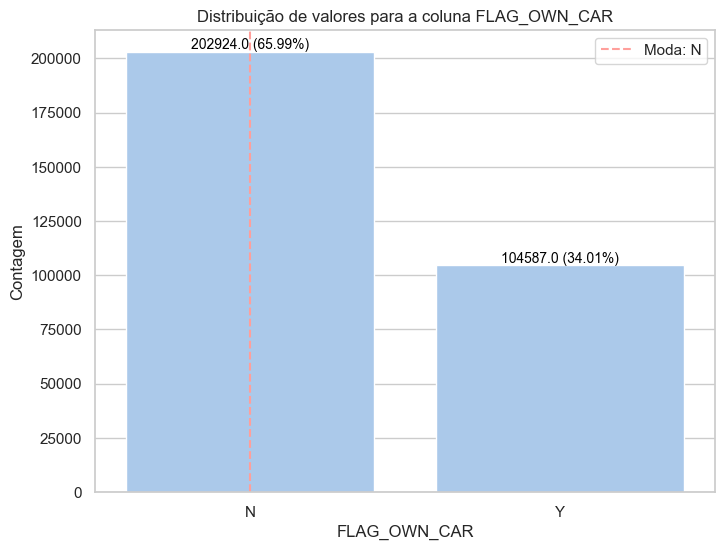

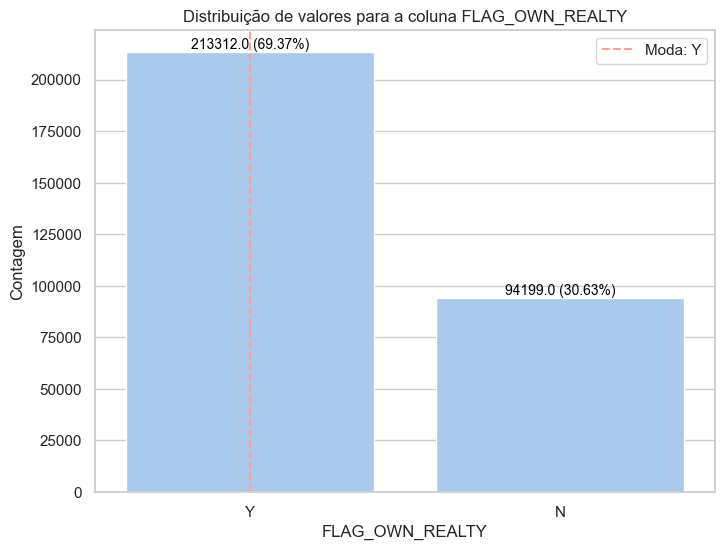

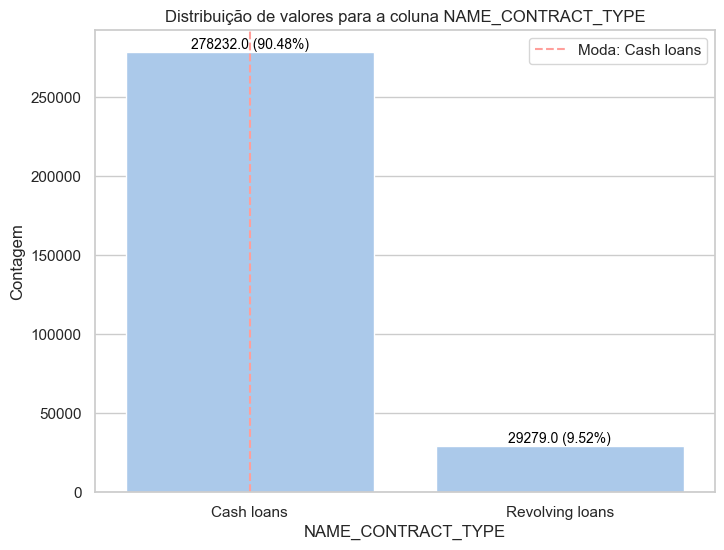

Estatísticas Descritivas: 
       FLAG_OWN_CAR FLAG_OWN_REALTY NAME_CONTRACT_TYPE
count        307511          307511             307511
unique            2               2                  2
top               N               Y         Cash loans
freq         202924          213312             278232
Analisando os dados nulos: 
                    Número de valores nulos  Porcentagem de valores nulos
FLAG_OWN_CAR                              0                           0.0
FLAG_OWN_REALTY                           0                           0.0
NAME_CONTRACT_TYPE                        0                           0.0


In [35]:
# Configurar estilo do seaborn e paleta de cores
sns.set(style="whitegrid", palette="pastel")

df_07 = data[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_CONTRACT_TYPE']]

# Plotando gráfico de barras para cada coluna
for coluna in df_07.columns:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=df_07, x=coluna)
    plt.title(f'Distribuição de valores para a coluna {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Contagem')
    
    # Adicionando contagens nos gráficos
    for p in ax.patches:
        ax.annotate(f'{p.get_height()} ({p.get_height() / len(df_07) * 100:.2f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    
    # Calculando a moda
    moda = df_07[coluna].mode()[0]
    plt.axvline(x=moda, color='r', linestyle='--', label=f'Moda: {moda}')
    plt.legend()
    
    plt.show()

print('Estatísticas Descritivas: ')
print(df_07.describe())

print('Analisando os dados nulos: ')
analisar_dados_nulos(df_07)

# transformacao de texto binario - funcao dummy

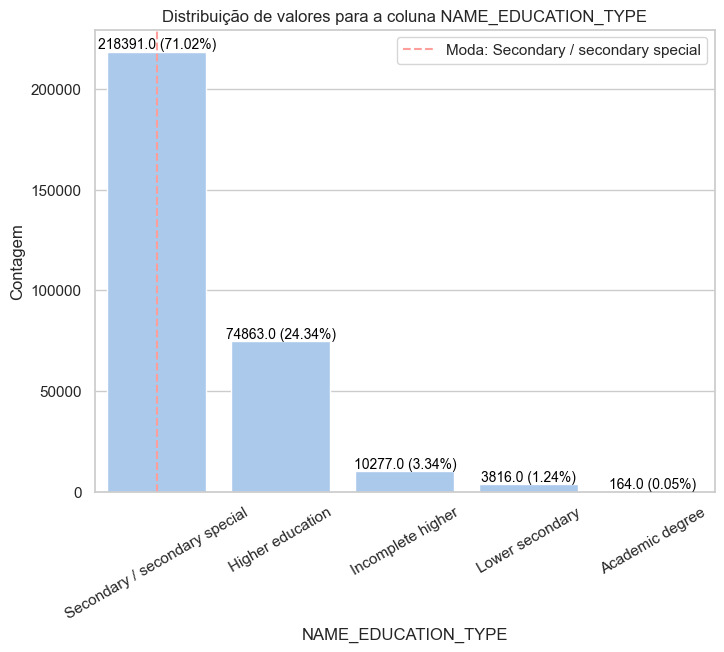

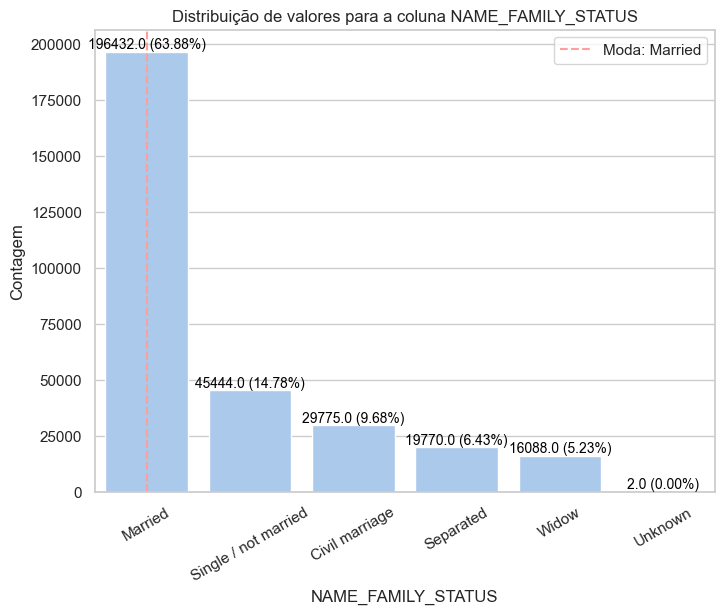

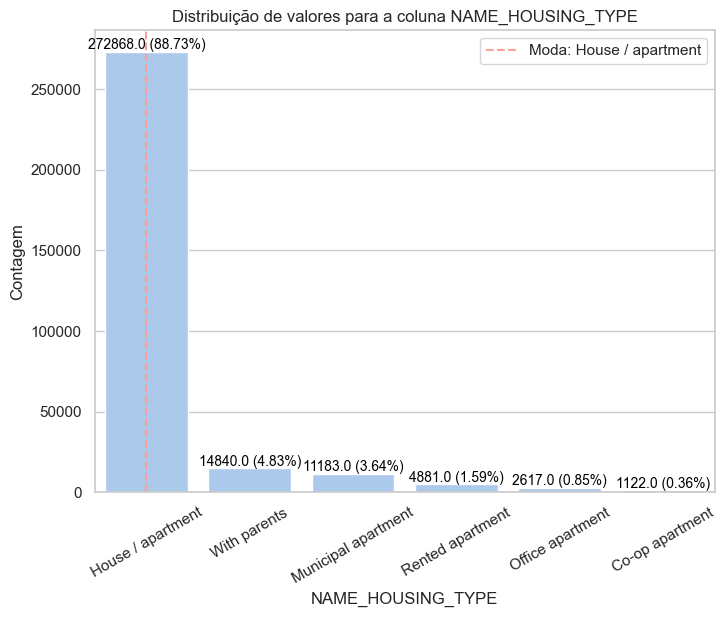

Estatísticas Descritivas: 
                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE
count                          307511             307511             307511
unique                              5                  6                  6
top     Secondary / secondary special            Married  House / apartment
freq                           218391             196432             272868
Analisando os dados nulos: 
                     Número de valores nulos  Porcentagem de valores nulos
NAME_EDUCATION_TYPE                        0                           0.0
NAME_FAMILY_STATUS                         0                           0.0
NAME_HOUSING_TYPE                          0                           0.0


In [36]:
# Configurar estilo do seaborn e paleta de cores
sns.set(style="whitegrid", palette="pastel")

df_08 = data[['NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']]

# Função para ordenar os dados de uma coluna
def ordenar_dados(coluna):
    contagem = df_08[coluna].value_counts().sort_values(ascending=False)
    return contagem

# Plotando gráfico de barras para cada coluna
for coluna in df_08.columns:
    plt.figure(figsize=(8, 6))
    
    # Ordenar dados
    contagem = ordenar_dados(coluna)
    ordem = contagem.index
    
    ax = sns.countplot(data=df_08, x=coluna, order=ordem)
    plt.title(f'Distribuição de valores para a coluna {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Contagem')
    
    # Adicionando contagens nos gráficos
    for p in ax.patches:
        ax.annotate(f'{p.get_height()} ({p.get_height() / len(df_08) * 100:.2f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    
    # Calculando a moda
    moda = df_08[coluna].mode()[0]
    plt.axvline(x=moda, color='r', linestyle='--', label=f'Moda: {moda}')
    plt.legend()
    
    # Rotacionando levemente as legendas do eixo x
    plt.xticks(rotation=30)
    plt.show()

print('Estatísticas Descritivas: ')
print(df_08.describe())

print('Analisando os dados nulos: ')
analisar_dados_nulos(df_08)

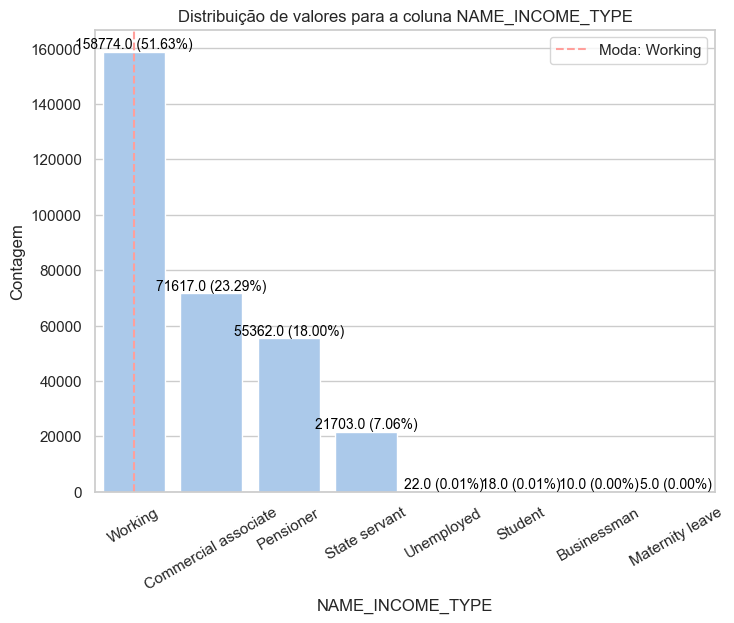

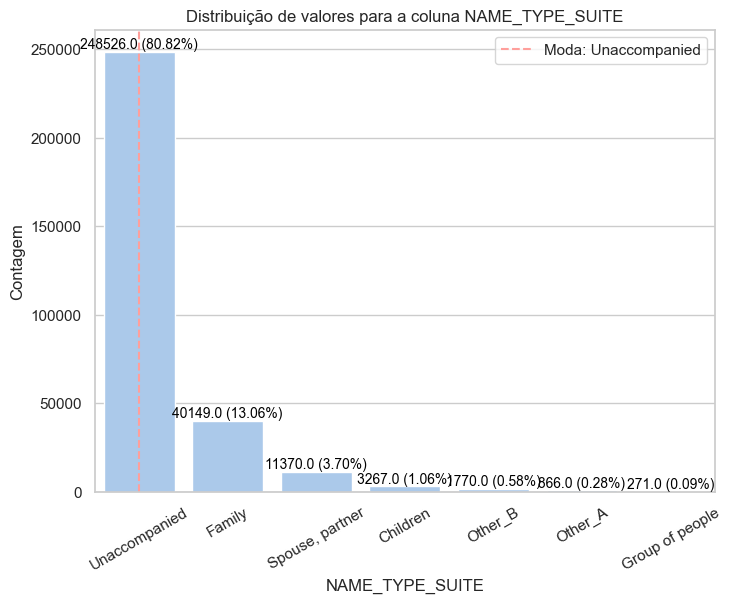

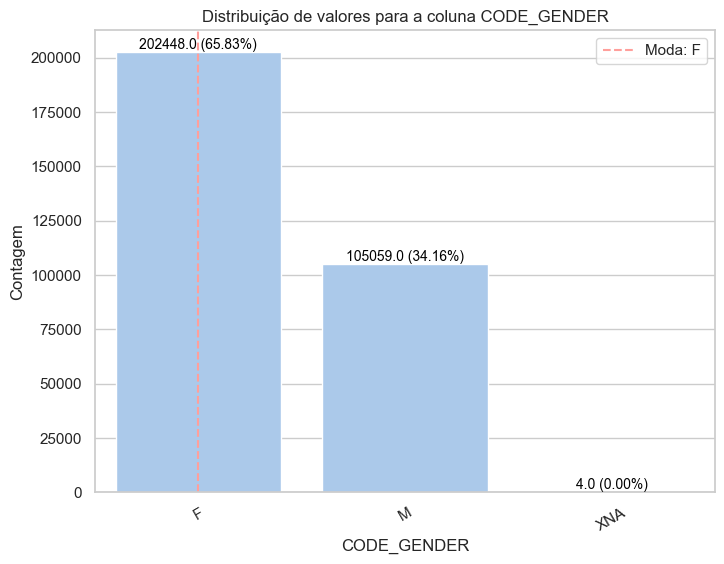

Estatísticas Descritivas: 
       NAME_INCOME_TYPE NAME_TYPE_SUITE CODE_GENDER
count            307511          306219      307511
unique                8               7           3
top             Working   Unaccompanied           F
freq             158774          248526      202448
Analisando os dados nulos: 
                  Número de valores nulos  Porcentagem de valores nulos
NAME_INCOME_TYPE                        0                      0.000000
NAME_TYPE_SUITE                      1292                      0.420148
CODE_GENDER                             0                      0.000000


In [38]:
# Configurar estilo do seaborn e paleta de cores
sns.set(style="whitegrid", palette="pastel")

df_09 = data[['NAME_INCOME_TYPE', 'NAME_TYPE_SUITE','CODE_GENDER']]

# Função para ordenar os dados de uma coluna
def ordenar_dados(coluna):
    contagem = df_09[coluna].value_counts().sort_values(ascending=False)
    return contagem

# Plotando gráfico de barras para cada coluna
for coluna in df_09.columns:
    plt.figure(figsize=(8, 6))
    
    # Ordenar dados
    contagem = ordenar_dados(coluna)
    ordem = contagem.index
    
    ax = sns.countplot(data=df_09, x=coluna, order=ordem)
    plt.title(f'Distribuição de valores para a coluna {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Contagem')
    
    # Adicionando contagens nos gráficos
    for p in ax.patches:
        ax.annotate(f'{p.get_height()} ({p.get_height() / len(df_09) * 100:.2f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    
    # Calculando a moda
    moda = df_09[coluna].mode()[0]
    plt.axvline(x=moda, color='r', linestyle='--', label=f'Moda: {moda}')
    plt.legend()
    
    # Rotacionando levemente as legendas do eixo x
    plt.xticks(rotation=30)
    plt.show()

print('Estatísticas Descritivas: ')
print(df_09.describe())

print('Analisando os dados nulos: ')
analisar_dados_nulos(df_09)


# 04 - 2a Tratativa: Limpeza e Pré-processamento dos Dados

In [8]:
colunas_selecionadas = [
    'SK_ID_CURR',
    'AMT_CREDIT', 
    'AMT_INCOME_TOTAL', 
    'CNT_CHILDREN',
    'CNT_FAM_MEMBERS',
    'DAYS_BIRTH', 
    'DAYS_EMPLOYED',
    'EXT_SOURCE_2',
    'AMT_ANNUITY', 
    'AMT_GOODS_PRICE', 
    'DAYS_REGISTRATION',
    'FLAG_PHONE',
    'REGION_RATING_CLIENT',
    'TARGET',
    'FLAG_OWN_CAR', 
    'FLAG_OWN_REALTY',
    'NAME_CONTRACT_TYPE',
    'NAME_EDUCATION_TYPE', 
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'NAME_INCOME_TYPE', 
    'NAME_TYPE_SUITE',
    'CODE_GENDER'
] # 23 colunas

df_tratamento = data[colunas_selecionadas]

# Definindo as colunas que têm linhas nulas
colunas_com_nulos = ['NAME_TYPE_SUITE', 'EXT_SOURCE_2', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS']

# Removendo linhas nulas apenas nas colunas especificadas
df_tratamento_sem_nulos = df_tratamento.dropna(subset=colunas_com_nulos)
df_tratamento_sem_nulos_2 = df_tratamento.dropna(subset=colunas_com_nulos)

# Calculando a quantidade de linhas removidas
linhas_removidas = len(df_tratamento) - len(df_tratamento_sem_nulos)

# Calculando a porcentagem de linhas removidas
percentual_removido = (linhas_removidas / len(df_tratamento)) * 100

# Verificando o tamanho do DataFrame após a remoção das linhas nulas
print("Número de linhas antes da remoção de linhas nulas:", len(df_tratamento))
print("Número de linhas após a remoção de linhas nulas:", len(df_tratamento_sem_nulos))
print("Número de linhas removidas:", linhas_removidas)
print(f"Percentual de linhas removidas: {percentual_removido:.2f}%")


Número de linhas antes da remoção de linhas nulas: 307511
Número de linhas após a remoção de linhas nulas: 305548
Número de linhas removidas: 1963
Percentual de linhas removidas: 0.64%


In [9]:
df_tratamento_sem_nulos_2.dtypes

SK_ID_CURR                int64
AMT_CREDIT              float64
AMT_INCOME_TOTAL        float64
CNT_CHILDREN              int64
CNT_FAM_MEMBERS         float64
DAYS_BIRTH                int64
DAYS_EMPLOYED             int64
EXT_SOURCE_2            float64
AMT_ANNUITY             float64
AMT_GOODS_PRICE         float64
DAYS_REGISTRATION       float64
FLAG_PHONE                int64
REGION_RATING_CLIENT      int64
TARGET                    int64
FLAG_OWN_CAR             object
FLAG_OWN_REALTY          object
NAME_CONTRACT_TYPE       object
NAME_EDUCATION_TYPE      object
NAME_FAMILY_STATUS       object
NAME_HOUSING_TYPE        object
NAME_INCOME_TYPE         object
NAME_TYPE_SUITE          object
CODE_GENDER              object
dtype: object

## Ajustando a base para o modelo estatistico

In [10]:
# Coluna CODE_GENDER
df_dummies_gender = pd.get_dummies(df_tratamento_sem_nulos['CODE_GENDER'], prefix='CODE_GENDER')
df_tratamento_sem_nulos = pd.concat([df_tratamento_sem_nulos, df_dummies_gender], axis=1)

# Coluna FLAG_OWN_CAR
df_dummies_car = pd.get_dummies(df_tratamento_sem_nulos['FLAG_OWN_CAR'], prefix='FLAG_CAR')
df_tratamento_sem_nulos = pd.concat([df_tratamento_sem_nulos, df_dummies_car], axis=1)

# Coluna FLAG_OWN_REALTY
df_dummies_realty = pd.get_dummies(df_tratamento_sem_nulos['FLAG_OWN_REALTY'], prefix='FLAG_REALTY')
df_tratamento_sem_nulos = pd.concat([df_tratamento_sem_nulos, df_dummies_realty], axis=1)

# Coluna NAME_CONTRACT_TYPE
df_dummies_contract = pd.get_dummies(df_tratamento_sem_nulos['NAME_CONTRACT_TYPE'], prefix='CONTRACT_TYPE')
df_tratamento_sem_nulos = pd.concat([df_tratamento_sem_nulos, df_dummies_contract], axis=1)

# Excluir a coluna original (opcional)
df_tratamento_sem_nulos.drop(columns=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_CONTRACT_TYPE'], inplace=True)

rename_dict = {
    'CONTRACT_TYPE_Cash loans': 'CONTRACT_TYPE_Cash',
    'CONTRACT_TYPE_Revolving loans': 'CONTRACT_TYPE_Revolving'
}

# Renomear as colunas e converter para letras minusculas
df_tratamento_sem_nulos.rename(columns=rename_dict, inplace=True)
df_tratamento_sem_nulos.columns = df_tratamento_sem_nulos.columns.str.lower()
df_tratamento_sem_nulos

,sk_id_curr,amt_credit,amt_income_total,cnt_children,cnt_fam_members,days_birth,days_employed,ext_source_2,amt_annuity,amt_goods_price,...,name_type_suite,code_gender_f,code_gender_m,code_gender_xna,flag_car_n,flag_car_y,flag_realty_n,flag_realty_y,contract_type_cash,contract_type_revolving
0,100002,406597.5,202500.0,0,1.0,-9461,-637,0.262949,24700.5,351000.0,...,Unaccompanied,False,True,False,True,False,False,True,True,False
1,100003,1293502.5,270000.0,0,2.0,-16765,-1188,0.622246,35698.5,1129500.0,...,Family,True,False,False,True,False,True,False,True,False
2,100004,135000.0,67500.0,0,1.0,-19046,-225,0.555912,6750.0,135000.0,...,Unaccompanied,False,True,False,False,True,False,True,False,True
3,100006,312682.5,135000.0,0,2.0,-19005,-3039,0.650442,29686.5,297000.0,...,Unaccompanied,True,False,False,True,False,False,True,True,False
4,100007,513000.0,121500.0,0,1.0,-19932,-3038,0.322738,21865.5,513000.0,...,Unaccompanied,False,True,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,254700.0,157500.0,0,1.0,-9327,-236,0.681632,27558.0,225000.0,...,Unaccompanied,False,True,False,True,False,True,False,True,False
307507,456252,269550.0,72000.0,0,1.0,-20775,365243,0.115992,12001.5,225000.0,...,Unaccompanied,True,False,False,True,False,False,True,True,False
307508,456253,677664.0,153000.0,0,1.0,-14966,-7921,0.535722,29979.0,585000.0,...,Unaccompanied,True,False,False,True,False,False,True,True,False
307509,456254,370107.0,171000.0,0,2.0,-11961,-4786,0.514163,20205.0,319500.0,...,Unaccompanied,True,False,False,True,False,False,True,True,False


In [133]:
df_tratamento_sem_nulos.dtypes

sk_id_curr                   int64
amt_credit                 float64
amt_income_total           float64
cnt_children                 int64
cnt_fam_members            float64
days_birth                   int64
days_employed                int64
ext_source_2               float64
amt_annuity                float64
amt_goods_price            float64
days_registration          float64
flag_phone                   int64
region_rating_client         int64
target                       int64
name_education_type         object
name_family_status          object
name_housing_type           object
name_income_type            object
name_type_suite             object
code_gender_f                 bool
code_gender_m                 bool
code_gender_xna               bool
flag_car_n                    bool
flag_car_y                    bool
flag_realty_n                 bool
flag_realty_y                 bool
contract_type_cash            bool
contract_type_revolving       bool
dtype: object

## Modelagem: Arvore de Decisao

In [44]:
# 2. Divisão do Conjunto de Dados
# Dividimos os dados em conjuntos de treino e teste para treinar e avaliar os modelos.

# Separar as features (X) e o target (y)
X = df_tratamento_sem_nulos.drop(columns=['target'])
y = df_tratamento_sem_nulos['target']

# Transformar variáveis categóricas em variáveis dummy
X = pd.get_dummies(X)

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
# 3. Treinamento de um Modelo de Árvore de Decisão
# Treinamos uma Árvore de Decisão usando DecisionTreeClassifier do Scikit-learn.
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [46]:
# 4. Treinamento de um Modelo de Random Forest
# Treinamos um Random Forest usando RandomForestClassifier do Scikit-learn.
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
y_test

84095     0
255477    0
288912    0
228805    0
135566    0
         ..
238092    0
80092     0
76294     1
135021    0
174932    1
Name: target, Length: 61110, dtype: int64

Decision Tree Model Evaluation
Accuracy: 0.8489
ROC AUC: 0.5260


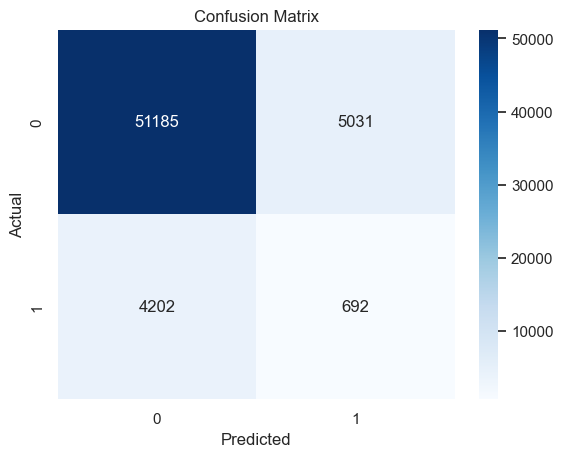

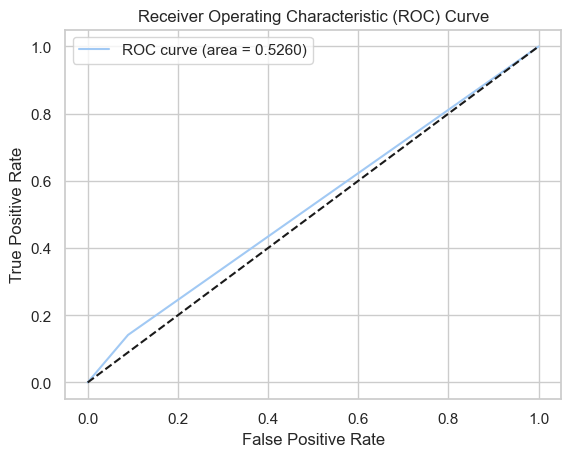

Random Forest Model Evaluation
Accuracy: 0.9200
ROC AUC: 0.6763


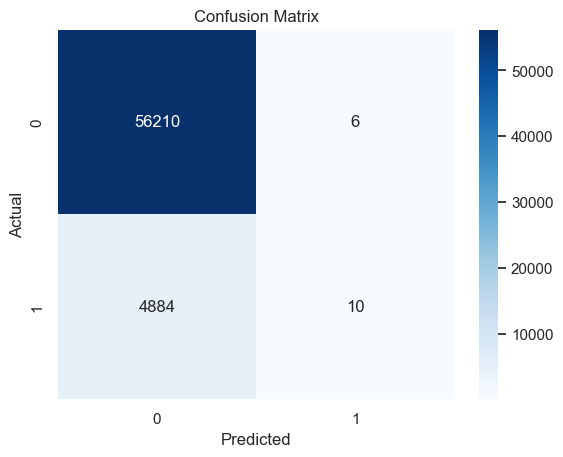

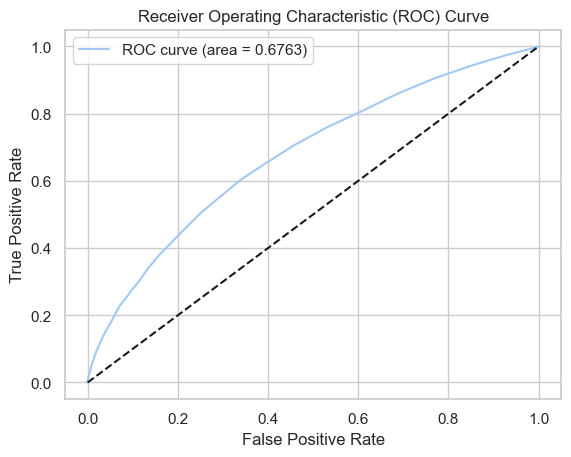

In [48]:
# 5. Avaliação dos Modelos
# Avaliamos os modelos usando métricas como Acurácia, Matriz de Confusão, ROC-AUC, etc.
def evaluate_model(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    print(f'Accuracy: {acc:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='best')
    plt.show()

print("Decision Tree Model Evaluation")
evaluate_model(dt_clf, X_test, y_test)

print("Random Forest Model Evaluation")
evaluate_model(rf_clf, X_test, y_test)

In [ ]:
# 6. Ajuste de Hiperparâmetros
# Utilizamos a busca em grade (GridSearchCV) para encontrar os melhores hiperparâmetros para os modelos.
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_rf_clf = grid_search.best_estimator_

print("Best Random Forest Model Evaluation")
evaluate_model(best_rf_clf, X_test, y_test)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


In [ ]:
# 7. Visualização dos Resultados
# Visualizamos a importância das características e as métricas de desempenho dos modelos.
# Importância das características
importances = best_rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(15, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Analises Extras

1. **Análise de perfil demográfico e financeiro dos clientes fraudulentos:** Quais são as características demográficas e financeiras mais comuns entre os clientes que cometeram fraude? Isso inclui idade, renda, número de membros da família, tipo de habitação, tipo de renda, entre outros.

2. **Análise da relação entre variáveis financeiras e ocorrência de fraude:** Existe alguma relação entre variáveis financeiras, como o valor do crédito solicitado, renda total, e a ocorrência de fraude? Quais são os padrões observados nas variáveis financeiras entre os clientes fraudulentos em comparação com os clientes não fraudulentos?

3. **Tempo de emprego e fraude:** Existe alguma relação entre o tempo de emprego dos clientes e a ocorrência de fraude? Os clientes com menos tempo de emprego são mais propensos a cometer fraude?

4. **Relação entre as fontes externas de pontuação (EXT_SOURCE) e fraude:** As pontuações externas, como a `ext_source_2`, têm alguma correlação com a ocorrência de fraude? Clientes com pontuações externas mais baixas são mais propensos a cometer fraude?

5. **Padrões de registro e fraude:** Existe alguma diferença nos padrões de registro (por exemplo, dias de registro desde a última atualização) entre os clientes fraudulentos e não fraudulentos?

6. **Padrões de comunicação e fraude:** Os clientes fraudulentos têm padrões de comunicação diferentes, como ter telefone, em comparação com os clientes não fraudulentos?

7. **Tipo de contrato e fraude:** Existe alguma associação entre o tipo de contrato de empréstimo e a ocorrência de fraude? Os clientes que optam por um tipo específico de contrato são mais propensos a cometer fraude?

Essas são apenas algumas das muitas questões que podem ser exploradas para entender melhor a questão da fraude bancária neste conjunto de dados. Cada uma dessas questões pode ser investigada utilizando técnicas de visualização de dados, análise estatística e modelagem preditiva.